# 와인 품질 데이터
<br>


관측값 : 6,497건 (Red : 1,599 , White : 4,898)


입력변수 12개
> 고정산, 휘발산, 구연산, 잔여당, 염화물, 무수아황산, 총이산화황, 밀도, 산성도, 황산염, 알콜도수
<br>

출력변수 1개
> 와인품질평가점수 1~10

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                      sep=';', header = 0)
redwine['type'] = 'red'
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [141]:
whitewine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                      sep=';', header = 0)
whitewine['type'] = 'white'
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [119]:
# 두 데이터프레임 병합
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [120]:
# 스페이스 처리되어있는 컬럼명을 언더바로 수정
wine.columns = wine.columns.str.replace(" ", "_")

In [121]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [122]:
# 연속형 데이터 요약 통계량 보기
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [123]:
# quality 컬럼 통계량 보기
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [124]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [125]:
# 오름차순 정리 및 빈도수 계산
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [126]:
# 와인 종류별 품질의 기술통계량
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [127]:
# 와인 종류별 품질의 사분위수
wine.groupby('type')['quality'].quantile([0, 0.25, 0.5, 0.75, 1]).unstack('type')

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


C:\Users\neimb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


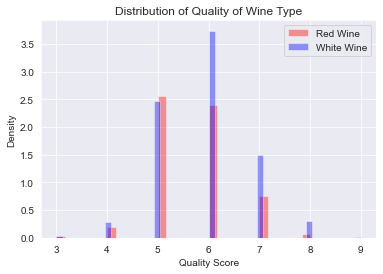

In [128]:
# 와인 종류별 품질의 분포
red_q = wine.loc[wine['type'] == 'red', 'quality']
white_q = wine.loc[wine['type'] == 'white', 'quality']

sns.set_style('darkgrid')
sns.distplot(red_q, norm_hist=True, kde=False, color ='red', label='Red Wine')
sns.distplot(white_q, norm_hist=True, kde=False, color ='blue', label='White Wine')
plt.title('Distribution of Quality of Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend()

# Quality Score가 5~7사이에 걸쳐져 있음

In [129]:
# 와인 종류별 품질 차이의 통계적 유의성 검정

wine.groupby('type')['quality'].aggregate(['std', 'mean'])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [130]:
# 모집단이 2개이므로 t-test이용
# 귀무가설 : 와인 종류별 품질의 차이는 없다.
# p-value < 0.05 는 평균 차이가 있음, > 0.05는 평균 차이가 없음
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
't-stat: {:.3f}, p-value: {:.4f}'.format(t_stat, p_value)

# p-value 값은 평균의 차이가 있음을 나타냄

't-stat: -9.686, p-value: 0.0000'

In [131]:
# 변수들 사이의 상관 계수 분석

wine_corr = wine.corr()
wine_corr

# 양의 상관관계 : X가 커질수록 Y도 커짐
# 음의 상관관계 : X가 커질수록 Y는 작아짐

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


<AxesSubplot:>

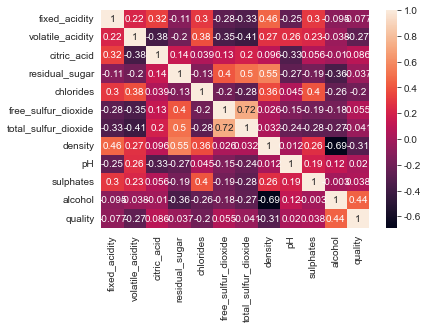

In [82]:
sns.heatmap(wine_corr, annot=True)

In [132]:
# 양의 상관관계 분석

wine_corr.loc[wine_corr['quality'] > 0, 'quality']

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [133]:
# 음의 상관관계 분석

wine_corr.loc[wine_corr['quality'] < 0, 'quality']

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

In [170]:
# Scatterplot을 이용한 산점도 행렬
# 산점도를 깔끔하게 그리기 위해, 여러 기능 변수와 관련된 데이터를 사용하는 경우 데이터 사이즈 조절 필요

red_sample = wine.loc[wine['type'] == 'red', :]
white_sample = wine.loc[wine['type'] == 'white', :]


In [171]:

red_idx = np.random.choice(red_sample.index, replace=True, size=200)
white_idx = np.random.choice(white_sample.index, replace=True, size=200)



In [172]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
234,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,red
877,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6,red
760,9.0,0.580,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5,red
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.0,5,red
1141,8.2,0.380,0.32,2.5,0.080,24.0,71.0,0.99624,3.27,0.85,11.0,6,red


In [173]:
wine_sample = wine_sample[~wine_sample.index.duplicated()]
len(wine_sample)

381

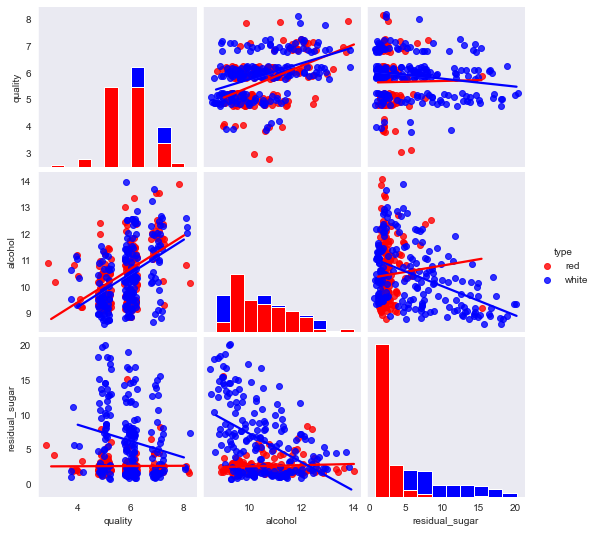

In [160]:
# Scatterplot과 Histogram 확인
sns.set_style('dark')
sns.pairplot(wine_sample, vars = ['quality', 'alcohol','residual_sugar'], kind='reg',
             plot_kws = {'ci' : False, 'x_jitter' : 0.25, 'y_jitter' : 0.25}, diag_kind='hist',
             diag_kws = {'bins' : 10, 'alpha' : 1}, hue='type', 
             palette = dict(red = 'red', white = 'blue', markers = ['o','s']))

# 